In [106]:
# Dependencies
import tweepy
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import style
import time

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [107]:
# Target Search Term
target_terms = ("@BBC", "@CBS", "@CNN","@FOXTV", "@nytimes")



# Variables for holding sentiments
sentiments = []

# Loop through all target users
for target in target_terms:

    # Variable for holding the oldest tweet
    oldest_tweet = None

    # Variables for holding sentiments
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []
    
    # Counter
    counter = 1
    
    # Loop through 5 pages that is 100 tweets
    for x in range(1, 6):

        # Run search around each tweet
        public_tweets = api.user_timeline(target, page=x, 
                                   result_type="recent", 
                                   max_id=oldest_tweet)

        # Loop through all tweets
        for tweet in public_tweets:

            # Run Vader Analysis on each tweet
            results = analyzer.polarity_scores(tweet["text"])

            # Add each value to the appropriate list
            compound = results["compound"]
            pos = results["pos"]
            neu = results["neu"]
            neg = results["neg"]
                
            compound_list.append(compound)
            positive_list.append(pos)
            negative_list.append(neu)
            neutral_list.append(neg)
                
            # Set the new oldest_tweet value
            oldest_tweet = tweet["id"] - 1

            # Add sentiments for each tweet into a list
            sentiments.append({"Date": tweet["created_at"],
                               "Username": tweet["user"]["name"],
                               "Tweet": tweet["text"],
                               "Compound": compound,
                               "Positive": pos,
                               "Negative": neu,
                               "Neutral": neg,
                               "Tweets Ago": counter})

            # Add to counter 
            counter += 1

In [108]:
# Convert sentiments to DataFrame
sentiments_df = pd.DataFrame(sentiments).round(3)
sentiments_df.head()

,Compound,Date,Negative,Neutral,Positive,Tweet,Tweets Ago,Username
0,0.681,Sat Sep 29 08:11:46 +0000 2018,0.763,0.000,0.237,RT @BBCOne: .@LadyGaga &amp; Jodie Whittaker p...,1,BBC
1,-0.102,Sat Sep 29 08:05:03 +0000 2018,0.746,0.136,0.118,"""I've broken around 80 bones"". 😬🏥\n\nMeet the ...",2,BBC
2,0.000,Sat Sep 29 07:03:06 +0000 2018,1.000,0.000,0.000,"Say hello to baby Omo, a rare albino squirrel....",3,BBC
3,0.000,Sat Sep 29 06:31:00 +0000 2018,1.000,0.000,0.000,"Over the last 50 years, the flesh-footed shear...",4,BBC
4,0.360,Fri Sep 28 20:31:03 +0000 2018,0.865,0.000,0.135,The Graham Norton Show is back! Tonight Bradle...,5,BBC


In [113]:
sentiments_df.to_csv("Sentiments Data Table.csv", encoding='utf-8', index=False, header=True)

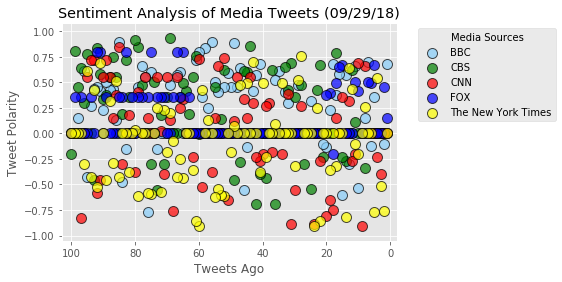

In [110]:
# Create plot
bbc_df = sentiments_df.loc[sentiments_df['Username']=="BBC"]
x_axis_1 = bbc_df['Tweets Ago']
y_axis_1 = bbc_df['Compound']
plt_1 = plt.scatter(x_axis_1,y_axis_1, marker="o",s=100,facecolors="lightskyblue",edgecolors="black",
                    alpha=0.7,linewidths=1, label="BBC")


cbs_df = sentiments_df.loc[sentiments_df['Username']=="CBS"]
x_axis_2 = cbs_df['Tweets Ago']
y_axis_2 = cbs_df['Compound']
plt_2 = plt.scatter(x_axis_2,y_axis_2, marker="o",s=100,facecolors="Green",edgecolors="black",
                    alpha=0.7,linewidths=1, label="CBS")

cnn_df = sentiments_df.loc[sentiments_df['Username']=="CNN"]
x_axis_3 = cnn_df['Tweets Ago']
y_axis_3 = cnn_df['Compound']
plt_3 = plt.scatter(x_axis_3,y_axis_3, marker="o", s=100,facecolors="Red",edgecolors="black",
                    alpha=0.7,linewidths=1, label="CNN")

fox_df = sentiments_df.loc[sentiments_df['Username']=="FOX"]
x_axis_4 = fox_df['Tweets Ago']
y_axis_4 = fox_df['Compound']
plt_4 = plt.scatter(x_axis_4,y_axis_4, marker="o",s=100,facecolors="Blue",edgecolors="black",
                    alpha=0.7,linewidths=1, label="FOX")

nyt_df = sentiments_df.loc[sentiments_df['Username']=="The New York Times"]
x_axis_5 = nyt_df['Tweets Ago']
y_axis_5 = nyt_df['Compound']
plt_5 = plt.scatter(x_axis_5,y_axis_5, marker="o",s=100,facecolors="Yellow",edgecolors="black",
                    alpha=0.7,linewidths=1, label="The New York Times")

plt.title("Sentiment Analysis of Media Tweets (%s)" % time.strftime("%x"))
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.xlim([x_axis_1.max()+3, x_axis_1.min()-3])
plt.legend(handles=[plt_1,plt_2,plt_3,plt_4,plt_5],title="Media Sources", bbox_to_anchor=(1.05, 1), loc=2)
plt.savefig("First_Plot.png")
plt.show()

In [111]:
average_compound = (sentiments_df.groupby("Username").mean())['Compound']

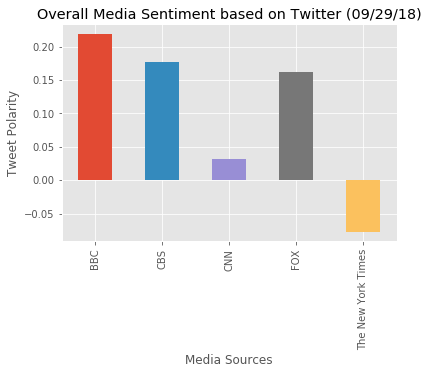

In [112]:
average_compound.plot(kind="bar", title="Overall Media Sentiment based on Twitter (%s)" % time.strftime("%x"))
plt.ylabel("Tweet Polarity")
plt.xlabel("Media Sources")
plt.savefig("Second_Plot.png")
plt.show()

## Three observable trends:
1. On average, The New York Times's recent Tweets are very negative emotion. The    other four media sources's recent Tweets are all positive emotion.
2. Recently, BBC has the most positive emotion tweets and CNN has the least        positive emotion tweets
3. Most tweets are neutral sentiment. 